# Declaracion de variables e importacion de biblioteca

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as im
import csv


#wfsjkaskfassaf
nm=1e-9 #Nanometros
um=1e-6 #micrometros
mm=1e-3 #Milimetros

# Inicializacion del codigo

In [3]:
#Definicion para manejo de complejos
def ploteo_complejo(mat,indicador,escala):#funcion de ploteo completo 
    #indicador tipo de grafica
    
    #mat=mat. completa que voy a pltear
    #indicador=I para intensidad, A amplitud, P fase
    #escala=1 para nada , 0 para Logaritmica
    if(indicador=="I"): #intensidad
      mat=np.abs(mat)**2 #modulado cuadro
    
    elif(indicador=="A"): #amplitud
      mat=np.abs(mat)
    
    elif(indicador=="P"):
      mat=np.angle(mat)
    else:
      mat=mat

    if(escala==1):  #escala en caso de si no se ve
        plt.figure()
        plt.imshow(mat)
        plt.show()
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001)) #escala logaritmica
        plt.show()
        
    return 0


In [4]:
#observar tamaño de imagen
np.shape(cv2.imread("b.png",0)) #dimensiones de imagen 0 es escala de grises

(768, 768)

# Punto a
Detectar la presencia de objetos transparentes en distribuciones puras de fase

In [5]:
#Se debe importar una matrix 

In [8]:
file="a.txt"
data=np.loadtxt(file,delimiter="\t",skiprows=0,usecols=[0,2])
print(data)


IndexError: list index out of range

In [10]:
f= open("a.csv")
reader = csv.reader(f)
for row in reader:
    print (row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
import numpy
filename = 'a.csv'
raw_data = open(filename)
data = numpy.loadtxt(raw_data, delimiter=",",skiprows=1)
print(data.shape)
print(data)

ValueError: could not convert string to float: '0.993158666136636-0.116772701765856i'

# Punto B
Eliminar el ruido que afecta la informacion de intensidad suministrada

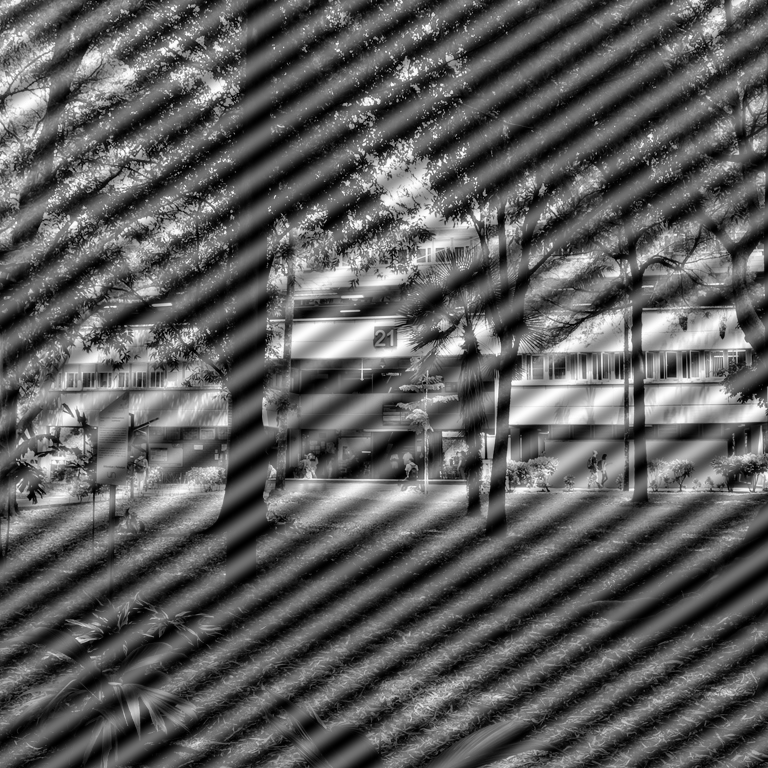

In [5]:
from IPython.display import Image
Image("b.png")

In [7]:
##Importe de imagen requerida

bloque21=cv2.imread("b.png",0) #1 es a color,9 grises
dona=cv2.imread("imagen_seno_oblicuo.png",0) #Se importa como una matriz
dona=dona/255
# La trasnformada de Fourier   


fft_img=np.fft.fftn(bloque21)
fft_img1=np.fft.fftshift(fft_img)

#Grafico de intensidad

plt.figure()
plt.title("Intensidad en TF")
plt.imshow(np.log(abs(fft_img1)))
plt.show() 
#sale como matrix
type(fft_img1)
           




TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [ ]:
x=ploteo_complejo(fft_img1,"I",0) #lo tengo como numero
type(x)

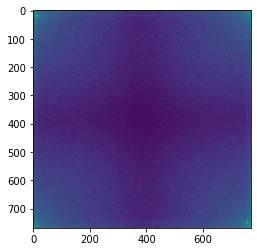

0

In [8]:
#trasnformada inversa de la original
fft_o1=np.fft.ifftn(bloque21)

ploteo_complejo(fft_o1,"I",0)

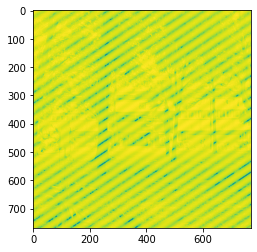

In [9]:
fft_img2=np.fft.fftn(bloque21)
fft_img1=np.fft.fftshift(fft_img2)
fft_o=np.fft.ifftn(fft_img1)

y=ploteo_complejo(fft_o,"A",0) #trasnformada por transformada inversa

In [ ]:
#Ahora ya tengo la imagen con su intensidad , tengo que filtrar en el dominio de fourier, hacerle la trasnformada 
#transformada inversa se obtiene la imagen sin ruido

In [ ]:
#Filtrar intensidad en el dominio de Fourier
np.shape(cv2.imread("b.png",1))

In [ ]:
#Resultado final

In [ ]:
mask2=np.ones(np.shape(bloque21),dtype="uint8") #matriz de 1

coordx=int(np.shape(bloque21)[1]/2)
coordy=int(np.shape(bloque21)[0]/2) #cuadrada, para circular debe usar 2 coordenadas

#print(coord)

cv2.circle(mask2,(int(0.9*coordx),(int(0.9*coordy))),5,0,-1) #tamaño del radio y cero
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

In [ ]:
new_imagen=np.fft.fftn(dona*fft_o)

plt.figure()
plt.imshow(np.log(abs(new_imagen)))
plt.show()

In [ ]:
#filtrado
ploteo_complejo(new_imagen,"I",0);

# Punto C

Detectar opticamente la presencia (ausencia) de un elemento en una imagen compuesta


In [ ]:
from IPython.display import Image
Image("c.jpg")


In [ ]:
from IPython.display import Image
Image("c_clue.jpg")